# 8 이미지를 위한 인공 신경망
## 8-1 합성곱 신경망을 사용한 이미지 분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255
train_scaled, val_scaled, train_target, val_target=\
    train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [2]:
model = keras.Sequential()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-12 11:08:23.896943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-12 11:08:23.897070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',
                              padding='same',input_shape=(28,28,1)))


In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

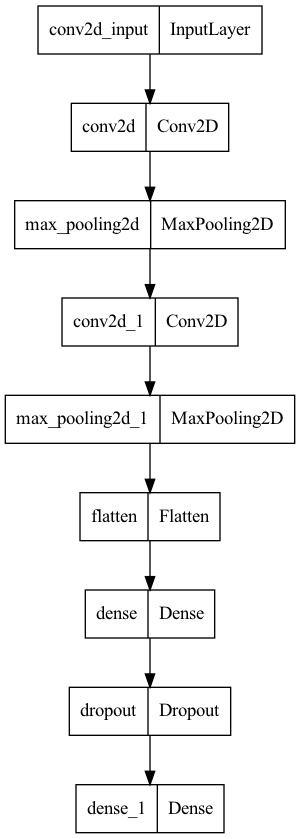

In [11]:
keras.utils.plot_model(model)

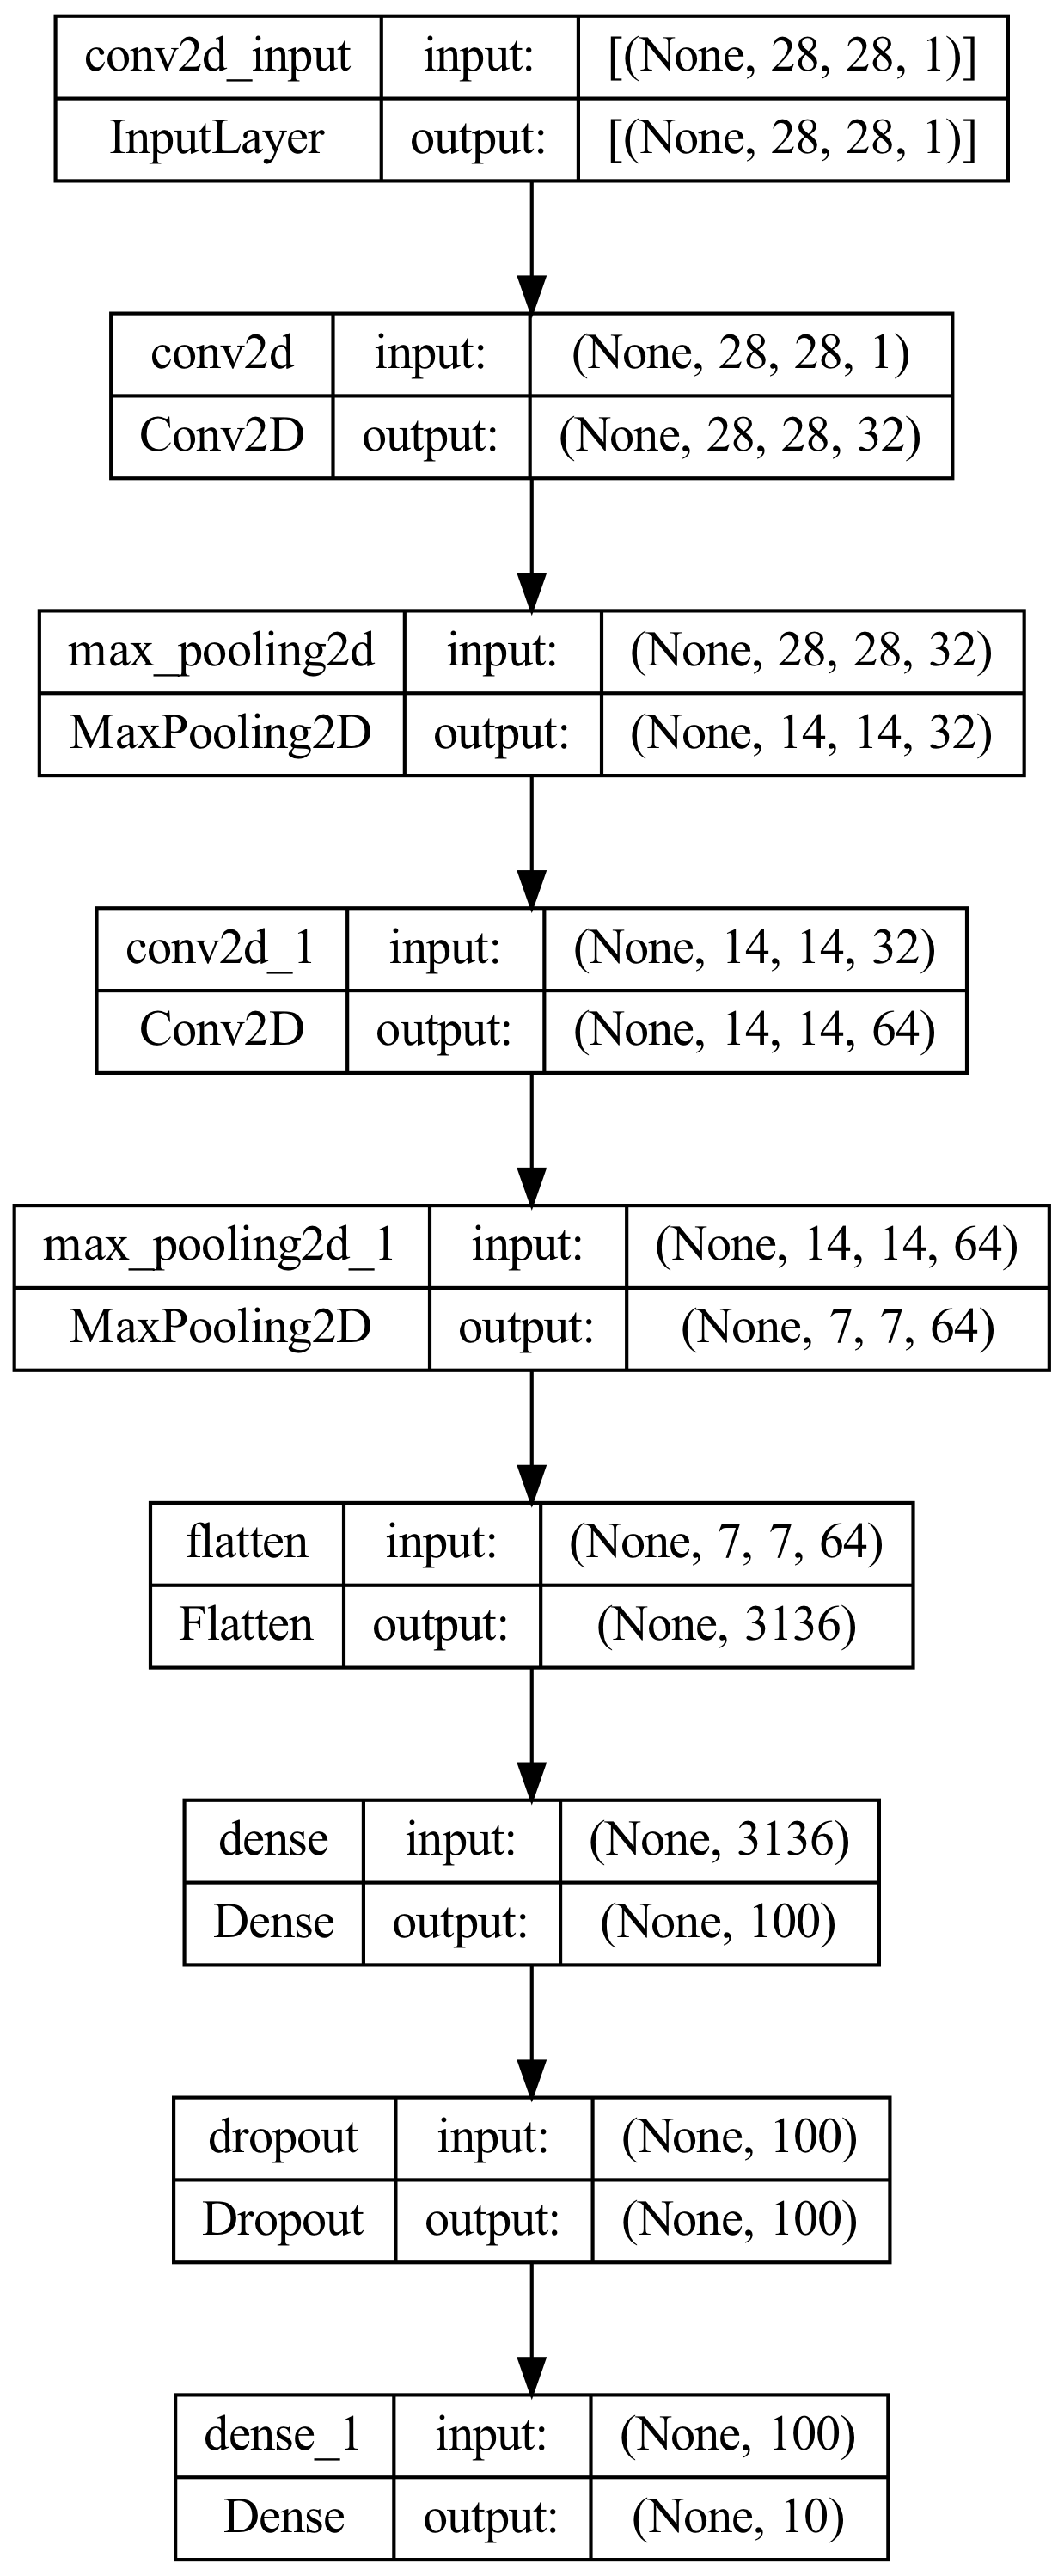

In [13]:
keras.utils.plot_model(model,show_shapes=True,
                       to_file='cnn-architecture.png',dpi=300)

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20


2022-07-12 11:16:38.278368: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-12 11:16:38.522920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 0.5267 - accuracy: 0.8122

2022-07-12 11:16:48.903464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 12s 7ms/step - loss: 0.5266 - accuracy: 0.8124 - val_loss: 0.3444 - val_accuracy: 0.8748
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3411 - accuracy: 0.8786 - val_loss: 0.2893 - val_accuracy: 0.8938
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2894 - accuracy: 0.8960 - val_loss: 0.2974 - val_accuracy: 0.8875
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2601 - accuracy: 0.9065 - val_loss: 0.2425 - val_accuracy: 0.9102
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2357 - accuracy: 0.9149 - val_loss: 0.2427 - val_accuracy: 0.9084
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2161 - accuracy: 0.9206 - val_loss: 0.2276 - val_accuracy: 0.9153
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1936 - accuracy: 0.9285 - val_loss: 0.2198 - val_accuracy: 0.9

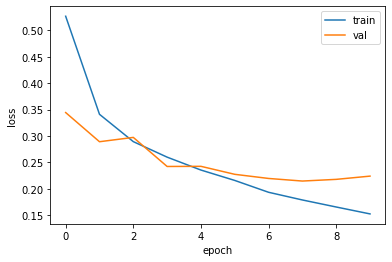

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2149 - accuracy: 0.9218


[0.21489571034908295, 0.921833336353302]

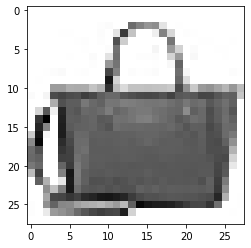

In [17]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [18]:
preds = model.predict(val_scaled[0:1])
print(preds)

2022-07-12 11:26:26.964226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 661ms/step
[[9.5941846e-15 8.1552137e-20 1.6348120e-17 1.7283043e-16 7.8065584e-19
  2.3943922e-12 3.5868116e-16 3.1595776e-13 1.0000000e+00 2.2794765e-14]]


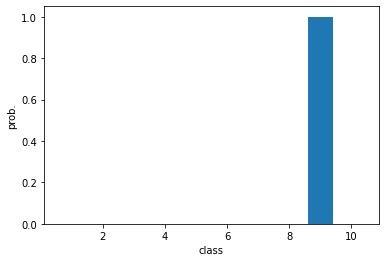

In [22]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [23]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [24]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [25]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [26]:
model.evaluate(test_scaled, test_target)

  5/313 [..............................] - ETA: 3s - loss: 0.3322 - accuracy: 0.9062 

2022-07-12 11:28:56.187614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.2383 - accuracy: 0.9142


[0.23834547400474548, 0.9142000675201416]